In [200]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Summary

The main topic of this project is to analyze the racial discrimination words,including chink,nigger&nigga,spic,honky,kika and wetback. And the main topic can be divided into two parts:1.The level of racial discrimination of each genre, indicated as the number of such words. 2.How many racial descrimination words used for each race? With one more step data cleaning job, eliminating outliers based on length of lyrics, I do a exploratory data analysis. The conclusions are that 1.Hip-Hop song has an overwhelming use of discrimination words and 2.it seems like the African Americans are disrespected most bacause of the highest fequency of nigger&nigga.

In [10]:
def read_processed_data():
    result = pyreadr.read_r('../output/processed_lyrics.RData')
    return result['dt_lyrics']
lyrics= read_processed_data()

load the processed R data, replace \n with blank space and then calculate the length of each song. It can shown the distribution of lengths.

In [12]:
lyrics = lyrics.replace({'\n': ' '}, regex=True)

In [13]:
lyrics['word_count'] = lyrics['lyrics'].str.split().str.len()

In [14]:
lyrics['word_count'].describe() 

count    125704.000000
mean        230.049951
std         147.364658
min          18.000000
25%         138.000000
50%         196.000000
75%         275.000000
max        6232.000000
Name: word_count, dtype: float64

From the histogram of lengths, it can be shown that there are some outliers. With several tries and the 3 sigma principle, it's finally decided that the range would from 138 to 1200.

In [47]:
import matplotlib.pyplot as plt

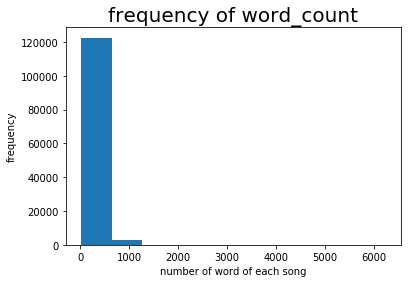

In [17]:
plt.hist(lyrics['word_count'])
plt.xlabel('number of word of each song')
plt.ylabel('frequency')
plt.title('frequency of word_count',fontsize=20)
plt.show()

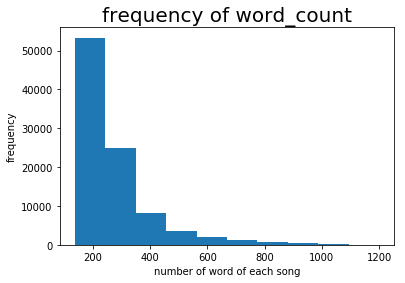

In [18]:
plt.hist(lyrics['word_count'],range=(138,1200))
plt.xlabel('number of word of each song')
plt.ylabel('frequency')
plt.title('frequency of word_count',fontsize=20)
plt.show()

Get the final data called lyrics_processed. Have a general look of its information.

In [19]:
lyrics1 = lyrics.loc[lyrics['word_count'] >= 138]

In [20]:
lyrics_processed = lyrics1.loc[lyrics1['word_count']<=1200]

In [48]:
lyrics_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94490 entries, 1 to 125703
Data columns (total 8 columns):
song            94490 non-null object
year            94490 non-null float64
artist          94490 non-null object
genre           94490 non-null object
lyrics          94490 non-null object
id              94490 non-null int32
stemmedwords    94490 non-null object
word_count      94490 non-null int64
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 6.1+ MB


In [21]:
lyrics_processed.to_csv('C:/Users/Lenovo/Desktop/fall2019-proj1--yizhenxu0310-master/data/lyrics_processed.csv')

Caculate each type of racial discrimination words of each genre and get the results as below.For futhur reference, chink refers to a racial discrimination to Chinnese,nigga&nigger to African Americans, Honky to white poeple, Spic to Latinos, Kike to Jew and Wetback to Mexican.

In [49]:
lyric_c = lyrics_processed.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('chink')].count())
chink = pd.DataFrame({'genre':['Country','Electronic','Folk','Hip-Hop','Indie','Jazz','Metal','Not Available','Other','Pop','R&B','Rock'],
                      'lyric_c':lyric_c.reset_index(drop = True)})
chink

,genre,lyric_c
0,Country,0
1,Electronic,0
2,Folk,0
3,Hip-Hop,12
4,Indie,0
5,Jazz,0
6,Metal,1
7,Not Available,1
8,Other,0
9,Pop,3


In [50]:
lyric_nn = lyrics_processed.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('nigger')].count())
nigger = pd.DataFrame({'genre':['Country','Electronic','Folk','Hip-Hop','Indie','Jazz','Metal','Not Available','Other','Pop','R&B','Rock'],
                      'lyric_nn':lyric_nn.reset_index(drop = True)})
nigger

,genre,lyric_nn
0,Country,4
1,Electronic,1
2,Folk,0
3,Hip-Hop,43
4,Indie,1
5,Jazz,0
6,Metal,9
7,Not Available,0
8,Other,0
9,Pop,9


In [51]:
lyric_n = lyrics_processed.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('nigga')].count())
nigga = pd.DataFrame({'genre':['Country','Electronic','Folk','Hip-Hop','Indie','Jazz','Metal','Not Available','Other','Pop','R&B','Rock'],
                      'lyric_n':lyric_n.reset_index(drop = True)})
nigga

,genre,lyric_n
0,Country,1
1,Electronic,15
2,Folk,0
3,Hip-Hop,3725
4,Indie,0
5,Jazz,14
6,Metal,69
7,Not Available,18
8,Other,29
9,Pop,238


In [52]:
lyric_s = lyrics_processed.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('spic')].count())
spic = pd.DataFrame({'genre':['Country','Electronic','Folk','Hip-Hop','Indie','Jazz','Metal','Not Available','Other','Pop','R&B','Rock'],
                      'lyric_s':lyric_s.reset_index(drop = True)})
spic

,genre,lyric_s
0,Country,14
1,Electronic,8
2,Folk,2
3,Hip-Hop,106
4,Indie,5
5,Jazz,9
6,Metal,36
7,Not Available,13
8,Other,0
9,Pop,76


In [54]:
lyric_h = lyrics_processed.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('honky')].count())
honky = pd.DataFrame({'genre':['Country','Electronic','Folk','Hip-Hop','Indie','Jazz','Metal','Not Available','Other','Pop','R&B','Rock'],
                      'lyric_h':lyric_h.reset_index(drop = True)})
honky

,genre,lyric_h
0,Country,54
1,Electronic,0
2,Folk,0
3,Hip-Hop,11
4,Indie,0
5,Jazz,5
6,Metal,0
7,Not Available,4
8,Other,0
9,Pop,4


In [55]:
lyric_k = lyrics_processed.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('kike')].count())
kike = pd.DataFrame({'genre':['Country','Electronic','Folk','Hip-Hop','Indie','Jazz','Metal','Not Available','Other','Pop','R&B','Rock'],
                      'lyric_k':lyric_k.reset_index(drop = True)})
kike

,genre,lyric_k
0,Country,0
1,Electronic,0
2,Folk,0
3,Hip-Hop,0
4,Indie,0
5,Jazz,0
6,Metal,1
7,Not Available,0
8,Other,0
9,Pop,1


In [56]:
lyric_w = lyrics_processed.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('wetback')].count())
wetback = pd.DataFrame({'genre':['Country','Electronic','Folk','Hip-Hop','Indie','Jazz','Metal','Not Available','Other','Pop','R&B','Rock'],
                      'lyric_w':lyric_w.reset_index(drop = True)})
wetback

,genre,lyric_w
0,Country,0
1,Electronic,0
2,Folk,0
3,Hip-Hop,1
4,Indie,0
5,Jazz,0
6,Metal,1
7,Not Available,0
8,Other,0
9,Pop,0


In [29]:
dis1=pd.merge(chink,nigga,on='genre')

In [30]:
dis2=pd.merge(dis1,nigger,on='genre')

In [31]:
dis3=pd.merge(dis2,spic,on='genre')

In [32]:
dis4=pd.merge(dis3,honky,on='genre')

In [33]:
dis5=pd.merge(dis4,kike,on='genre')

In [58]:
discrimination=pd.merge(dis5,wetback,on='genre')

In [59]:
discrimination['lyric_b']=discrimination['lyric_n']+discrimination['lyric_nn']

In [60]:
discrimination.drop('lyric_n',axis=1,inplace=True)

In [61]:
discrimination.drop('lyric_nn',axis=1,inplace=True)

In [62]:
discrimination.set_index(['genre'],inplace=True)

In [63]:
discrimination.loc['col_sum']=discrimination.apply(lambda x:x.sum())

In [64]:
discrimination['row_sum']=discrimination.apply(lambda x:x.sum(),axis=1)    

Since the nigga and nigger actually all refer to the racial discrimination to African Ameircan, they are added up into one column called lyric_b. And calculate the sum of each row and column.

In [65]:
discrimination

,lyric_c,lyric_s,lyric_h,lyric_k,lyric_w,lyric_b,row_sum
genre,,,,,,,
Country,0,14,54,0,0,5,73
Electronic,0,8,0,0,0,16,24
Folk,0,2,0,0,0,0,2
Hip-Hop,12,106,11,0,1,3768,3898
Indie,0,5,0,0,0,1,6
Jazz,0,9,5,0,0,14,28
Metal,1,36,0,1,1,78,117
Not Available,1,13,4,0,0,18,36
Other,0,0,0,0,0,29,29


To analyze the level of racial discrimination of each genre,the related words are counted and plotted as below.It can be shown that
1.The hip-hop style music has an overwhelming usage of racial discrimination words with 3898 times.
2.For other genre except hip-hop, there is no significant difference about the frequency of racial discrimination words.
And to futher explore the reasons of these, I come up with two reasons.
1.The origination.Hip-Hop genre music originate from street, where more conflits of race occur. And it's a typical kind of So the song lyrics of hip hop also contains more such words.
2.The style itself. Hip-Hop music is generally more freestyle and less rigorous about the use of words compared with other classic music.During the freestyle, it's more likey to voluntarily speak out some racial discrimination words.

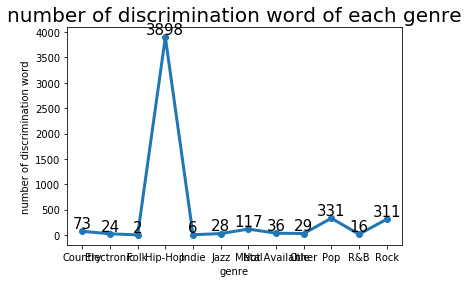

In [46]:
#genre
genre=[0,1,2,3,4,5,6,7,8,9,10,11]
dis_word=[73,24,2,3898,6,28,117,36,29,331,16,311]
plt.plot(genre,dis_word,marker='o',linewidth=3)
plt.xlabel('genre')
plt.ylabel('number of discrimination word')
plt.title('number of discrimination word of each genre',fontsize=20)
for a,b in zip(genre,dis_word):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=15)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Country','Electronic','Folk','Hip-Hop','Indie','Jazz','Metal','Not Available','Other','Pop','R&B','Rock'])
plt.show()

To analyze the level of racial discrimination of each race,the related words are counted and plotted as below.It can be shown that
1.The nigga& nigger is overwhelmingly used in the song lyrics, which is 4250 times. And it seems the African Americans are highly disrespected compared with other races.The reason might be that the illegal african amricans immegrants issue has last for almost 100 years, so this issue is mostly reflected.
2.The Latinos are second disrespected as being called spic.And one explanation for the racial discrimiantion is also abou the immigrants issues.
3.It turns out that chink only shows 21 times, which is the opposite from what we see now that Trump government is strongly unfriendly to Chinese.


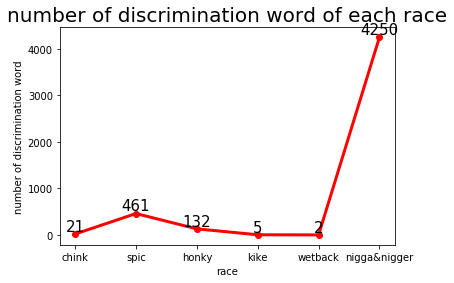

In [44]:
#race
race=[1,2,3,4,5,6]
dis_word=[21,461,132,5,2,4250]
plt.plot(race,dis_word,marker='o',linewidth=3,color='r')
plt.xlabel('race')
plt.ylabel('number of discrimination word')
plt.title('number of discrimination word of each race',fontsize=20)
plt.xticks([1,2,3,4,5,6],['chink','spic','honky','kike','wetback','nigga&nigger'])
for a,b in zip(race,dis_word):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=15)
plt.show()

To conclude, from the number of racial discrimination words used, it seems like African Americans are still being disrespcte most compared with other races and the Hip-Hop music shows most racial discrimination.